In [210]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as  sns
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

## Exercice 1 : Une première regression linéaire

La régression linéaire est sans aucun doute l’algorithme de Machine Learning (ML) le plus simple qui soit. Comme
tous les algorithmes de ML, il est instancié à partir d’exemples , et permet ensuite de généraliser à de nouvelles données.
Ce modèle est suffisamment simple pour qu’une solution mathématique immédiate existe dans tous les cas. Il "suffit" de calibrer le modèle et non de l’entraîner comme avec les réseaux de neurones ou les approches basées sur
l’apprentissage par renforcement.
En guise d’illustration on prendra ici un exemple trivial avec quelques données, qui pourraient par exemple correspondre à prédiction du poids d’un individu à partir de sa taille, la température en fonction de l’altitude, ou les ventes d’un
produit en fonction de sa qualité.
Toutes les méthodes du framework que nous allons utiliser, ScikitLearn, fonctionnent avec des np.array. La
technique d’utilisation est toujours la même:
1. récupérer les données sous forme de np.array
2. créer un modèle
3. calibrer ce modèle avec la méthode fit(...)
4. généraliser (faire des prédictions) avec la méthode predict(...)


#### Q1. Mettez en forme les observations (xi, yi) suivantes afin qu’elles soient utilisables: (5, 5), (15,20), (25, 14), (35, 32), (45, 22), (55, 38). Affichez-les comme nuage de points sur une grille.

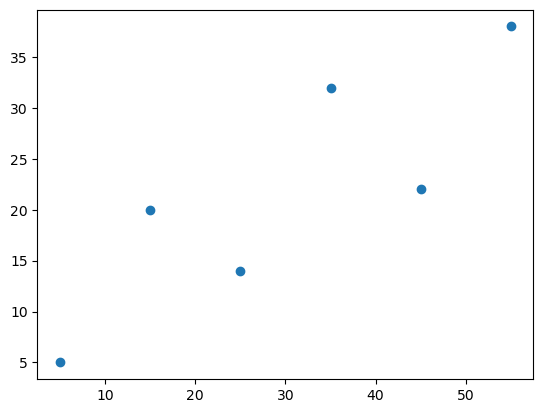

In [211]:
# (5, 5), (15,20), (25, 14), (35, 32), (45, 22), (55, 38)

points = np.array([(5, 5), (15,20), (25, 14), (35, 32), (45, 22), (55, 38)])
x, y = points[:,0].reshape(-1, 1), points[:,1]



plt.scatter(x, y)

#### Q2. Créez le modèle de régression qui représente le mieux ces observations, c’est-à-dire la droite minimisant l’écart avec les points.

In [212]:

linear = LinearRegression()
linear.fit(x, y)

LinearRegression()

#### Q3. Quel est l’équation de la droite obtenue ainsi ? Autrement dit, quelles sont les valeurs de la pente et de l’ordonnée à l’origine ?

In [213]:
print("intercept: " + str(linear.intercept_) + " slope: " + str(linear.coef_))

intercept: 5.633333333333333 slope: [0.54]


#### Q4. Puisque nous disposons d’un modèle, effectuons quelques prédictions. Quelles sont les valeurs prédites pour x1 = 20 et x2 = 40 ?

In [214]:
y1, y2 = linear.predict([[20], [40]])

print(y1)
print(y2)

16.43333333333333
27.23333333333333


#### Q5. Tracez la droite de régression ainsi que le nuage de points. Vérifiez que vous retrouvez bien les valeurs prédites pour les nouvelles observations données précédemment.

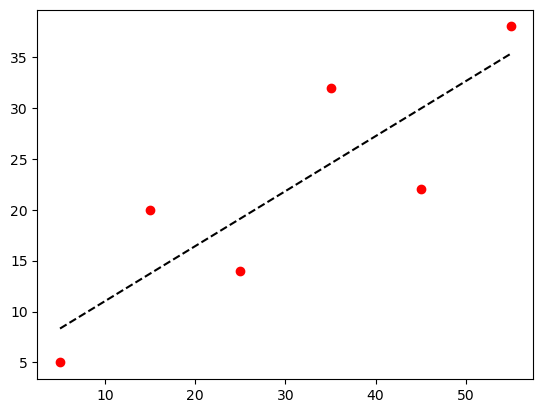

In [215]:
xRegression = np.linspace(x.min(), x.max(), 3)
yRegression = linear.predict(xRegression.reshape(-1,1))


plt.plot(x, y, 'ro')
plt.plot(xRegression, yRegression, 'black', linestyle='--')

#### Q6. Quantifiez la qualité du modèle en affichant les scores R2, MSE, RMSE et MAE.

In [216]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


r2 = linear.score(x, y)
mse = mean_squared_error(y, linear.predict(x), squared=True)
rmse = mean_squared_error(y, linear.predict(x), squared=False)
mae = mean_absolute_error(y, linear.predict(x))

print(r2)
print(mse)
print(rmse)
print(mae)

0.715875613747954
33.75555555555556
5.809953145728075
5.466666666666668


## Exercice 2 : Le cas polynomial

La régression polynomiale se gère de la même manière que la régression linéaire, mais avec une étape supplémentaire. Il est en effet nécessaire de transformer le tableau des entrées pour inclure des termes non linéaires.

#### Q1. Mettez en forme les observations (xi, yi) suivantes afin qu’elles soient utilisables: (5, 15), (15, 11), (25, 2), (35, 8), (45, 25), (55, 32). Affichez-les comme nuage de points sur une grille.

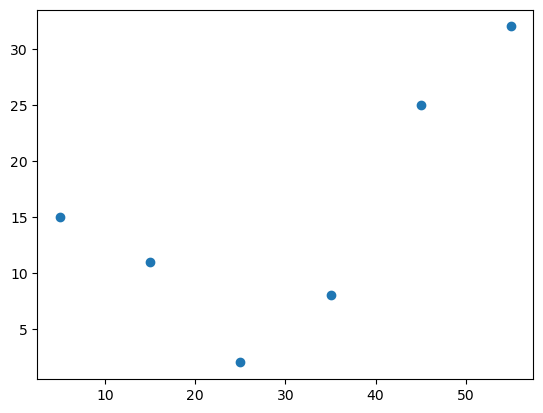

In [217]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([15, 11, 2, 8, 25, 32])

plt.scatter(x, y)

#### Q2. Créez le modèle de régression et calibrez-le avec les données précédentes.

In [218]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(x)

poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)

LinearRegression()

#### Q3. Puisque nous disposons d’un modèle, effectuons quelques prédictions. Quelles sont les valeurs prédites pour x1 = 20 et x2 = 40 ?

In [219]:

y1, y2 = lin2.predict(poly.fit_transform(np.array([[20], [40]])))

print(y1)
print(y2)

6.2580357142856595
13.858035714285712


#### Q4. Affichez les coefficients du polynôme, puis calculez les scores R2, MSE, RMSE et MAE afin d’évaluer la qualité du modèle.

In [220]:
print("intercept: " + str(linear.intercept_) + " slope: " + str(linear.coef_))

R2 = lin2.score(X_poly, y)
MSE = mean_squared_error(y, lin2.predict(X_poly), squared=True)
RMSE = mean_squared_error(y, lin2.predict(X_poly), squared=False)
MAE = mean_absolute_error(y, lin2.predict(X_poly))

print(R2)
print(MSE)
print(RMSE)
print(MAE)

intercept: 5.633333333333333 slope: [0.54]
0.8908516262498563
11.305952380952393
3.3624325095014758
2.9285714285714377


#### Q5. Affichez les données initiales ainsi que le polynôme calculé.

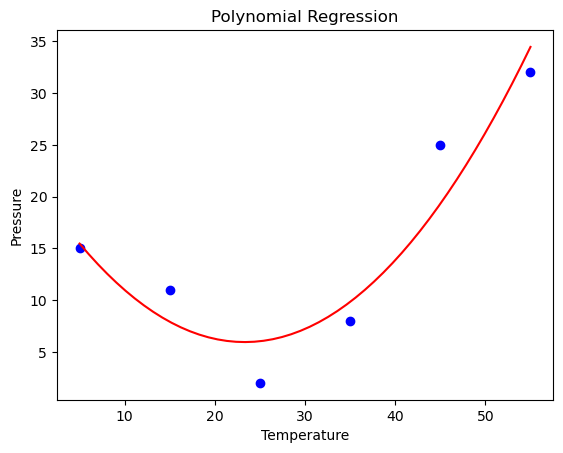

In [221]:
plt.scatter(x, y, color='blue')

xRegression = np.linspace(x.min(), x.max()).reshape(-1, 1)

plt.plot(xRegression, lin2.predict(poly.transform(xRegression)),
         color='red')
plt.title('Polynomial Regression')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
 
plt.show()

#### Q6. Malheureusement, vous n’avez que quelques points pour établir votre modèle.

#### Q6.1. Récupérez le fichier data_mm_additional.csv. Incorporez ces nouvelles données et évaluez la précision de votre modèle avec ces nouvelles données (R2, MSE, RMSE, MAE). Affichez finalement tous les points et le polynôme de régression.

0.32774706917786545
83.79791771244759
9.154120258793172
7.527275876907082


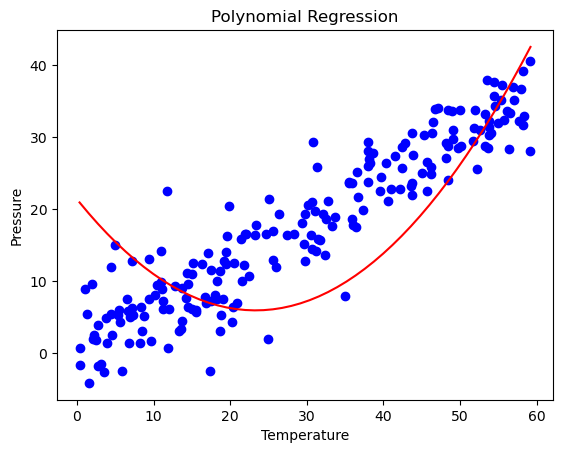

In [222]:
test = pd.read_csv('./tp_mm_05_res/data_mm_additional.csv')

x_test = test['x'].to_numpy().reshape(-1, 1)
x_test_poly = poly.transform(x_test)

y_test = test['y'].to_numpy()


R2 = lin2.score(x_test_poly, y_test)
MSE = mean_squared_error(y_test, lin2.predict(x_test_poly), squared=True)
RMSE = mean_squared_error(y_test, lin2.predict(x_test_poly), squared=False)
MAE = mean_absolute_error(y_test, lin2.predict(x_test_poly))

print(R2)
print(MSE)
print(RMSE)
print(MAE)



plt.scatter(x_test, y_test, color='blue')

xRegression = np.linspace(x_test.min(), x_test.max()).reshape(-1, 1)

plt.plot(xRegression, lin2.predict(poly.transform(xRegression)),
         color='red')
plt.title('Polynomial Regression')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
 
plt.show()

#### Q6.2. Trouvez un nouveau modèle si nécessaire qui obtiendrait de meilleurs résultats.

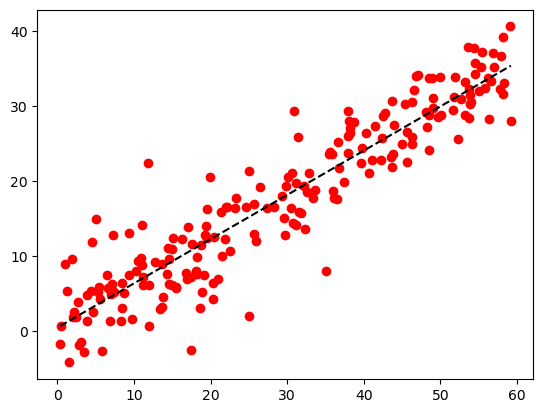

In [223]:
# utiliser le 80% pour le modele, 20% pour le test
# polynome linear
data = pd.read_csv('./tp_mm_05_res/data_mm_additional.csv')
x = data['x'].to_numpy().reshape(-1, 1)
y = data['y'].to_numpy()

linear = LinearRegression()
linear.fit(x, y)

xRegression = np.linspace(x.min(), x.max(), 3)
yRegression = linear.predict(xRegression.reshape(-1,1))


plt.plot(x, y, 'ro')
plt.plot(xRegression, yRegression, 'black', linestyle='--')

## Exercice 3 : Prédiction de loyers

Vous êtes consulté par une agence immobilière pour prédire les loyers des différents arrondissements de Paris, afin de les aider à prendre des décisions d’achat d’appartements.

#### Q1. Récupérez les données du fichier data_mm_house.csv. Affichez les 5 premières lignes du fichier pour comprendre sa structure ainsi que le nombre de lignes qu’il contient.

In [224]:
some_houses = pd.read_csv('./tp_mm_05_res/data_mm_house.csv')

print(some_houses.head(5))

print(some_houses.size)

   price  surface  arrondissement
0   1820     46.1             1.0
1   1750     41.0             1.0
2   1900     55.0             1.0
3   1950     46.0             1.0
4   1950     49.0             1.0
2481


#### Q2. Affichez la description statistique des données, et représentez les données sous forme d’un nuage de points pour déterminer la présence éventuelle d’outliers.

              price     surface  arrondissement
count    827.000000  822.000000      822.000000
mean    2007.342201   58.045925        4.142336
std     1890.894229   44.827522        3.202151
min      390.000000   10.000000        1.000000
25%     1050.000000   28.655000        2.000000
50%     1567.000000   46.100000        3.000000
75%     2346.000000   73.000000        4.000000
max    25000.000000  415.000000       10.000000


Text(0, 0.5, 'surface')

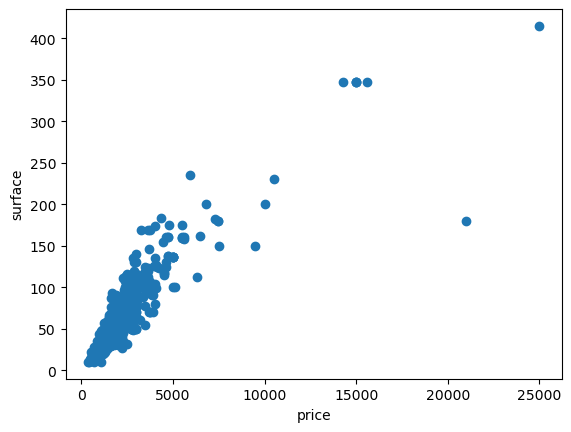

In [225]:
print(some_houses.describe())

plt.scatter(some_houses['price'], some_houses['surface'])
plt.xlabel('price')
plt.ylabel('surface')


#### Q3. Nettoyez les données et ignorez les outliers. Ré-affichez le nuage de points correspondant. Faites-en sorte de pouvoir distinguer les arrondissements.

C:\Users\Jez\AppData\Local\Temp\ipykernel_2716\3878259171.py:1: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.options.mode.use_inf_as_na = True
c:\Users\Jez\.conda\envs\tp_mm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jez\.conda\envs\tp_mm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jez\.conda\envs\tp_mm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.type

<Axes: xlabel='price', ylabel='surface'>

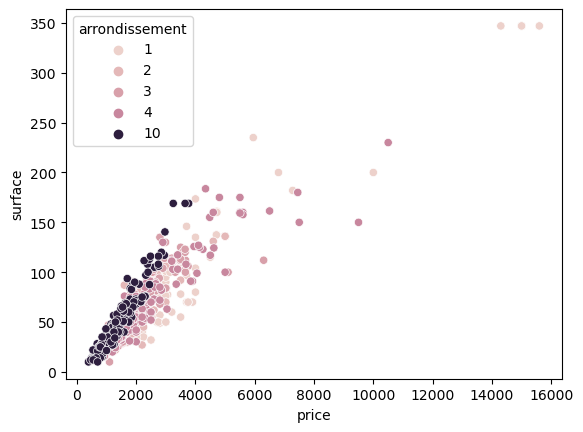

In [226]:
pd.options.mode.use_inf_as_na = True

some_houses = pd.read_csv('./tp_mm_05_res/data_mm_house_cleaned.csv')
some_houses = some_houses[some_houses.notna()]

sns.scatterplot(x=some_houses['price'], y=some_houses['surface'], hue=some_houses['arrondissement'])

#### Q4. Représentez la répartition des prix par arrondissement. Est-elle plus ou moins semblable dans les différents arrondissements ? Où les prix sont-ils le moins élevés ?

c:\Users\Jez\.conda\envs\tp_mm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jez\.conda\envs\tp_mm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jez\.conda\envs\tp_mm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='arrondissement', ylabel='price'>

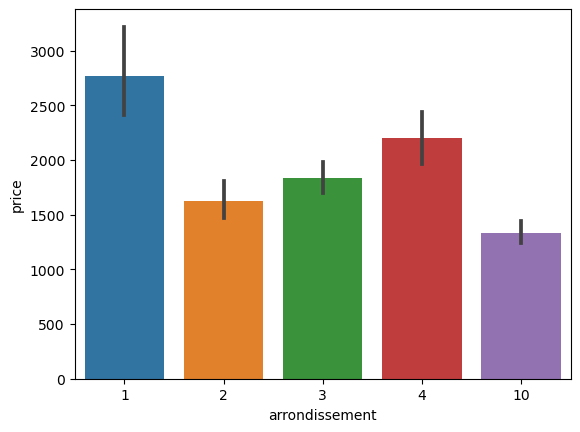

In [227]:
sns.barplot(x=some_houses['arrondissement'],y=some_houses['price'],)
# relativement homogene, tous lineaire
# le moins élevé dans le 10eme arrondissement

#### Q5. Vaut-il mieux faire un unique modèle de régression commun quelque soit l’arrondissement, ou un modèle différent par arrondissement ?

In [228]:
# il vaut mieux faire une regression lineaire par arrondissement

#### Q5.1. Afin d’évaluer correctement les modèles, divisez votre jeu de données. Conservez 30% des données pour les tests.

In [229]:

from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(some_houses[['arrondissement', 'surface']], some_houses['price'], train_size=0.7)

#### Q5.2. Créez le modèle de régression unique pour l’ensemble des arrondissements. Tracez le et évaluer ses scores.

c:\Users\Jez\.conda\envs\tp_mm\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Jez\.conda\envs\tp_mm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jez\.conda\envs\tp_mm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jez\.conda\envs\tp_mm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


0.8032766214645355
300448.2479801581
548.13159731962
366.8259807931432


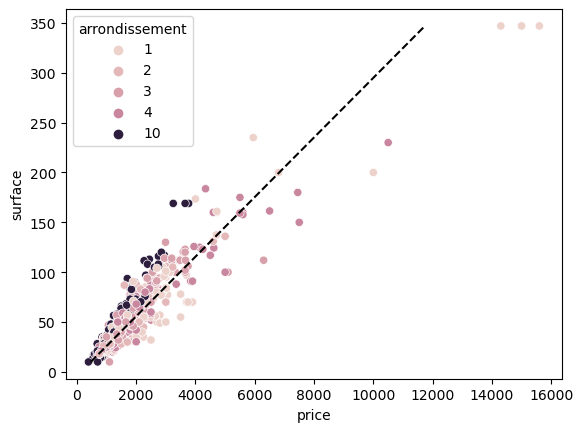

In [230]:
linear = LinearRegression()
linear.fit(xtrain, ytrain)

xRegression = np.linspace(xtrain.min(), xtrain.max(), 3)
yRegression = linear.predict(xRegression)

linePredSurface = xRegression[:,1]

# scatter display
sns.scatterplot(x=ytrain, y=xtrain['surface'], hue=xtrain['arrondissement'])
plt.plot(yRegression, linePredSurface, 'black', linestyle='--')
plt.xlabel('price')
plt.ylabel('surface')

# error margin display
from sklearn.metrics import mean_absolute_error, mean_squared_error


r2 = linear.score(xtest, ytest)
mse = mean_squared_error(ytest, linear.predict(xtest), squared=True)
rmse = mean_squared_error(ytest, linear.predict(xtest), squared=False)
mae = mean_absolute_error(ytest, linear.predict(xtest))

print(r2)
print(mse)
print(rmse)
print(mae)

#### Q5.3. Créez les modèles propres à chaque arrondissement. Tracez-les et évaluer leurs scores.

c:\Users\Jez\.conda\envs\tp_mm\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Jez\.conda\envs\tp_mm\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Jez\.conda\envs\tp_mm\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Jez\.conda\envs\tp_mm\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Jez\.conda\envs\tp_mm\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


===> arrondissement n° 1
r2 0.7221546990647425
mse 373255.04388506786
rmse 610.9460237083697
mae 455.8949067763439
===> arrondissement n° 2
r2 0.8672966253458123
mse 135488.80819297978
rmse 368.08804407774477
mae 250.00921831776242
===> arrondissement n° 3
r2 0.8067775441377084
mse 274805.76828656445
rmse 524.2191987008531
mae 273.68006503594114
===> arrondissement n° 4
r2 0.8868292256558187
mse 210677.15458783036
rmse 458.99581107873996
mae 342.3566322061669
===> arrondissement n° 10
r2 0.9214660718599652
mse 29530.90622137642
rmse 171.84558830932036
mae 145.59815534571652


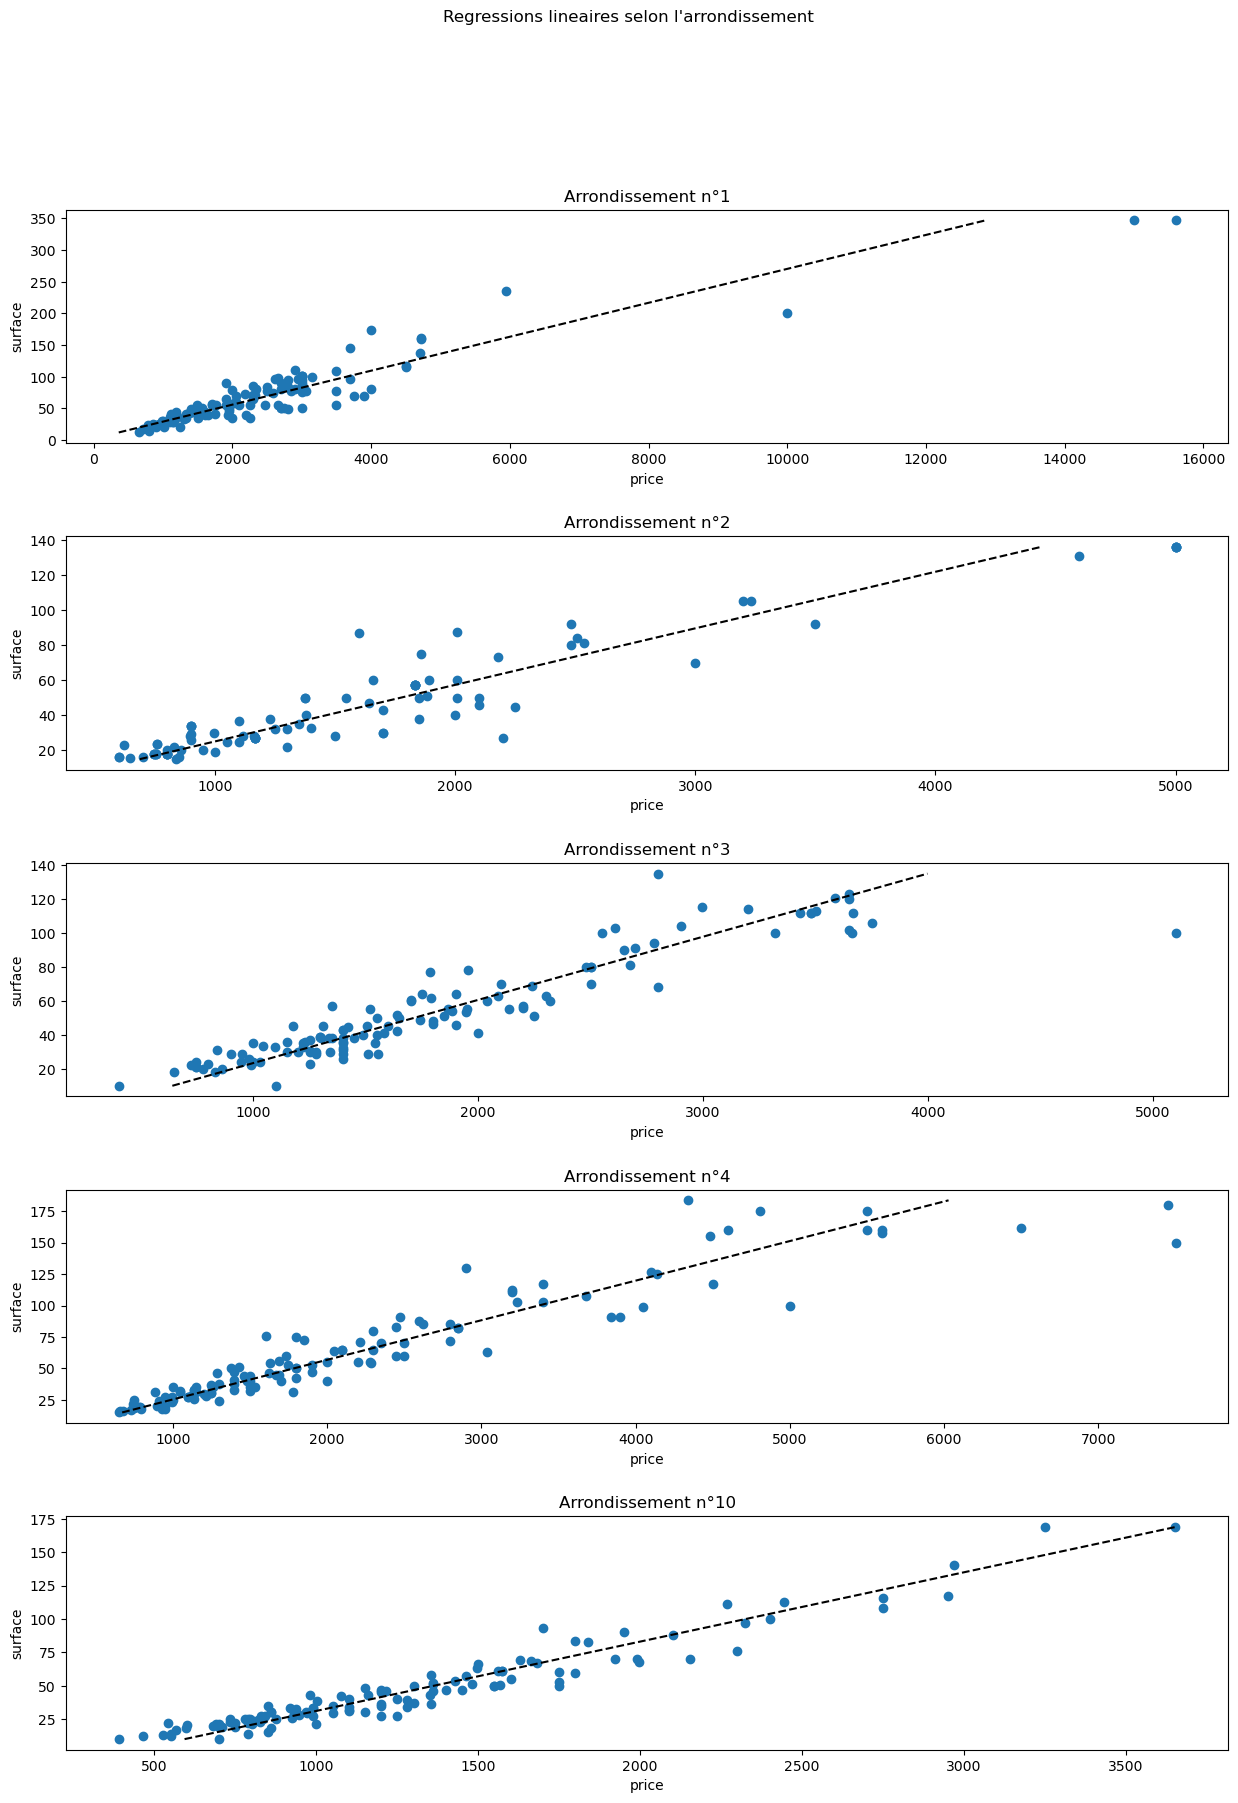

In [263]:
def linear_plot_for(some_houses, arrondissement, plot_index, axes):
	
	xtrain, xtest, ytrain, ytest = train_test_split(some_houses[['arrondissement', 'surface']], some_houses['price'], train_size=0.7)

	linear = LinearRegression()
	linear.fit(xtrain, ytrain)

	xRegression = np.linspace(xtrain.min(), xtrain.max(), 3)
	yRegression = linear.predict(xRegression)

	linePredSurface = xRegression[:,1]

	# scatter display
	axes[plot_index].scatter(ytrain, xtrain['surface'])
	axes[plot_index].plot(yRegression, linePredSurface, 'black', linestyle='--')
	axes[plot_index].set_title('Arrondissement n°' + str(arrondissement))

	plt.setp(axes[plot_index], xlabel='price')
	plt.setp(axes[plot_index], ylabel='surface')

def linear_precision_for(some_houses):

	xtrain, xtest, ytrain, ytest = train_test_split(some_houses[['arrondissement', 'surface']], some_houses['price'], train_size=0.7)

	linear = LinearRegression()
	linear.fit(xtrain, ytrain)

	# error margin display
	r2 = linear.score(xtest, ytest)
	mse = mean_squared_error(ytest, linear.predict(xtest), squared=True)
	rmse = mean_squared_error(ytest, linear.predict(xtest), squared=False)
	mae = mean_absolute_error(ytest, linear.predict(xtest))

	print("r2", str(r2))
	print("mse", str(mse))
	print("rmse", str(rmse))
	print("mae", str(mae))

arrondissements = houses['arrondissement'].drop_duplicates()

fig, axes = plt.subplots(len(arrondissements), figsize=(15, 4 * len(arrondissements)))
fig.suptitle("Regressions lineaires selon l'arrondissement")
plt.subplots_adjust(hspace=0.4)

for index, arrondissement in enumerate(arrondissements):
	linear_plot_for(houses.groupby('arrondissement').get_group(arrondissement), arrondissement, index, axes)
	
	print("===> arrondissement n°", arrondissement)
	linear_precision_for(houses.groupby('arrondissement').get_group(arrondissement))

# print(arrondissements)
	

# some_houses.groupby('arrondissement').get_group(1)